Shannoni entroopia
----


Juhendaja/õppejõud:
Priit Järv

Üliõpilane: 
Enrico Vompa


Üliõpilase matriklinumber: 
185787 IAIB

Õppekava nimetus: 
Tehisintellekti ja masinõppe alused


Ülesandeks on kirjutada programm, mis leiab iga tunnuse kohta, kui palju ta looma klassi kohta informatsiooni annab, kasutades Shannoni entroopiat.

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

features = ["hair", "feathers", "eggs", "milk", "airborne",
            "aquatic", "predator", "toothed", "backbone", "breathes", "venomous",
            "fins", "legs", "tail", "domestic", "catsize"]

zoo_data = pd.read_csv("zoo.data",
                       header=None,
                       names=["name"] + features + ["type"])

zoo_data


,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
entropies = []

print("Custom entropy for ___")
for feature in features:
    
    N = len([x for x in zoo_data[feature]])
    Ni_list = list(zoo_data.groupby([feature]).size().items())
    
    Nij_list = list(zoo_data.groupby([feature, "type"]).size().items())
    
    Ni_dict = {}
    Nij_dict = {}
    
    for key, val in Ni_list:
        Ni_dict[key] = val
    
    for key, val in Nij_list:
        Nij_dict[key] = val
    
    H = 0
    
    for i in Ni_dict.keys():
        
        Hi = 0
        
        J = max([i for (_, i) in Nij_list])
        
        for j in range(J):
            if Nij_dict.get((i, j)):
                Pij = Nij_dict[(i, j)] / Ni_dict[i]
                Hi -= Pij * math.log2(Pij)
        if (Ni_dict.get(i)):
            H += (Ni_dict[i] * Hi) / N
    
    entropies.append(H)
    print(f"                   feature {feature} is: {round(H, 4)}")

Custom entropy for ___
                   feature hair is: 1.5999
                   feature feathers is: 1.6726
                   feature eggs is: 1.5604
                   feature milk is: 1.4162
                   feature airborne is: 1.9209
                   feature aquatic is: 2.0011
                   feature predator is: 2.2971
                   feature toothed is: 1.5249
                   feature backbone is: 1.7144
                   feature breathes is: 1.7761
                   feature venomous is: 2.2575
                   feature fins is: 1.9239
                   feature legs is: 1.0275
                   feature tail is: 1.8901
                   feature domestic is: 2.3399
                   feature catsize is: 2.0821


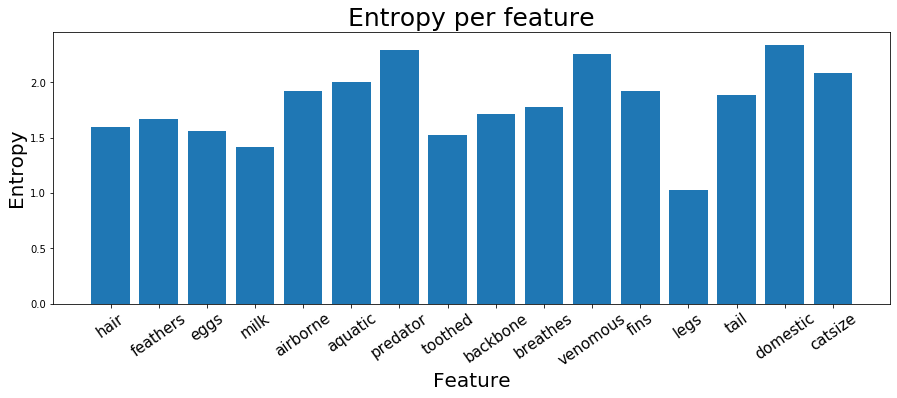

In [5]:
index = np.arange(len(features))
plt.bar(index, entropies)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Entropy', fontsize=20)
plt.xticks(index, features, fontsize=15, rotation=35)
plt.title('Entropy per feature', fontsize=25)
plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

In [4]:
m = max(entropies)
print(f"Max entropy is {m}")
for i in [i for i, j in enumerate(entropies) if j == m]:
    print(f"    Feature '{features[i]}' has that")
print()

m = min(entropies)
print(f"Min entropy is {m}")
for i in [i for i, j in enumerate(entropies) if j == m]:
    print(f"    Feature '{features[i]}' has that")

Max entropy is 2.339890902448521
    Feature 'domestic' has that

Min entropy is 1.0275127791400998
    Feature 'legs' has that


Kokkuvõte:



Mida kõrgem on entroopia seda suurem on informatsiooni hulk

Entroopia kui number ise ei ütle väga midagi. Kui võrrelda atribuutide entroopiaid, siis see ütleb, kumb neist annab rohkem informatsiooni. 

Antud andmestiku põhjal järeldab, et 'kodustatud' atribuut annab kõige rohkem ning 'jalgade arv' annab kõige vähem infot looma kohta.